In [1]:
import backtesting_____boaf_____ as boaf
import pandas as pd
import numpy as np
import itertools

4
[(2.0,), (2.5,), (3.0,), (3.5,)]
1
upper_gain_la_factor2.0
Profit       : 1663.81
Total Trades : 2193
Avg Gain per trade   : 0.76 %
Avg Bar per trade    : 1.0
Percent Profitable   : 52.58 %
Profit Factor        : 1.11
Max Drawdown : -71.63
Average Gain per Month: 110.92066666666666

Monthly gain : Year_Month
2023-01    187.24
2023-02     40.88
2023-03     88.98
2023-04    119.01
2023-05    178.94
2023-06     72.48
2023-07     68.37
2023-08     67.51
2023-09    162.64
2023-10     93.52
2023-11     97.92
2023-12    156.40
2024-01    123.58
2024-02    161.42
2024-03     44.92
Name: P&L, dtype: float64


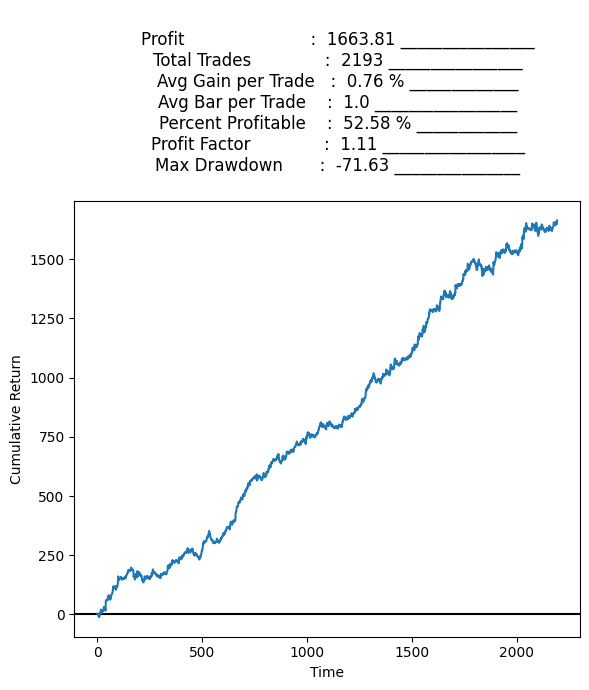

2
upper_gain_la_factor2.5
Profit       : 1837.78
Total Trades : 2129
Avg Gain per trade   : 0.86 %
Avg Bar per trade    : 1.0
Percent Profitable   : 52.84 %
Profit Factor        : 1.12
Max Drawdown : -58.27
Average Gain per Month: 122.51866666666666

Monthly gain : Year_Month
2023-01    169.46
2023-02     40.60
2023-03    103.88
2023-04    116.36
2023-05    198.22
2023-06     42.03
2023-07     60.52
2023-08    100.56
2023-09    171.72
2023-10    139.43
2023-11     98.14
2023-12    174.51
2024-01    159.94
2024-02    173.20
2024-03     89.21
Name: P&L, dtype: float64


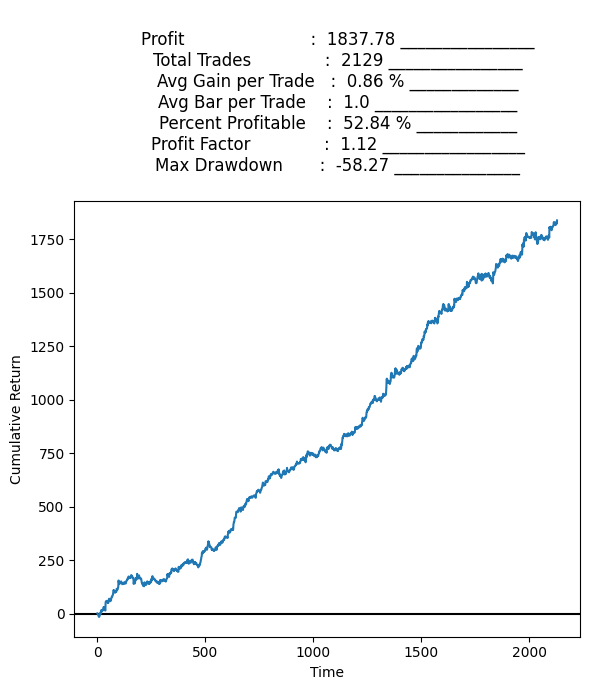

3
upper_gain_la_factor3.0
Profit       : 1716.87
Total Trades : 2060
Avg Gain per trade   : 0.83 %
Avg Bar per trade    : 1.0
Percent Profitable   : 52.52 %
Profit Factor        : 1.11
Max Drawdown : -63.91
Average Gain per Month: 114.458

Monthly gain : Year_Month
2023-01    145.41
2023-02     33.01
2023-03     76.10
2023-04    114.07
2023-05    168.45
2023-06     47.32
2023-07     50.15
2023-08    121.90
2023-09    173.09
2023-10    156.37
2023-11     96.55
2023-12    156.72
2024-01    124.10
2024-02    162.63
2024-03     91.00
Name: P&L, dtype: float64


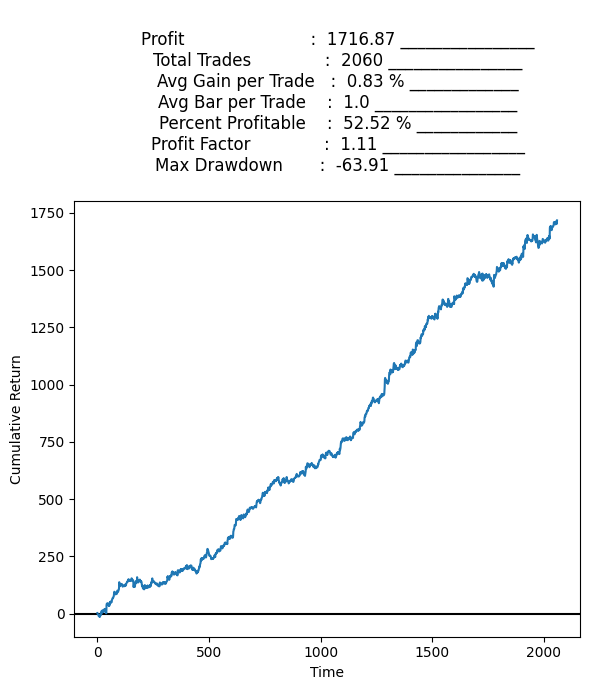

4
upper_gain_la_factor3.5
Profit       : 1761.48
Total Trades : 1970
Avg Gain per trade   : 0.89 %
Avg Bar per trade    : 1.0
Percent Profitable   : 53.2 %
Profit Factor        : 1.14
Max Drawdown : -58.64
Average Gain per Month: 117.432

Monthly gain : Year_Month
2023-01    126.40
2023-02     53.95
2023-03    106.94
2023-04    122.37
2023-05    133.46
2023-06     79.53
2023-07     21.39
2023-08    151.23
2023-09    151.46
2023-10    165.33
2023-11    104.91
2023-12    162.97
2024-01    113.55
2024-02    169.42
2024-03     98.57
Name: P&L, dtype: float64


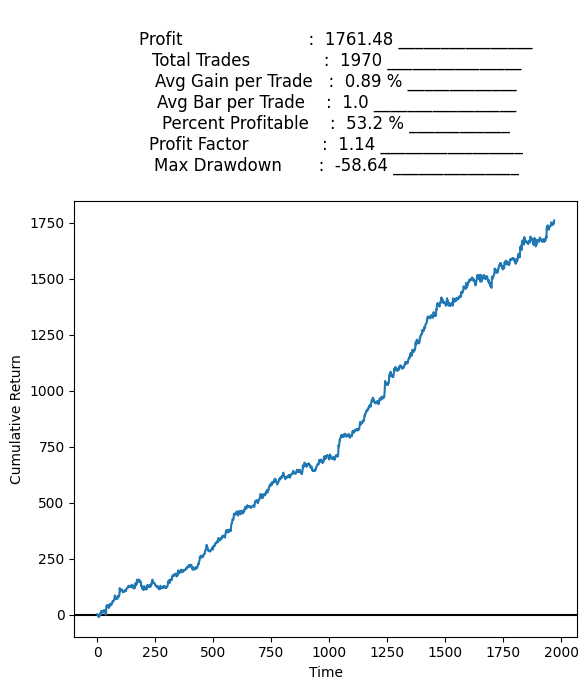

In [2]:
combinations_df = pd.DataFrame(columns=['total_profit', 'total_trades', 'avg_gain_per_trade', 'avg_bar_per_trade', 'percent_profitable', 'profit_factor', 'max_drawdown'])

def generate_combinations(ranges):

    all_ranges = [[round(i, rnd) for i in np.arange(start, stop+step, step)] for start, stop, step, rnd in ranges]
    combinations = list(itertools.product(*all_ranges))

    return combinations

# start 0 to 10, step 1, after point value 0
ranges = [(2, 3.1, 0.5, 2)]
combinations = generate_combinations(ranges)
print(len(combinations))
print(combinations)
n = 0
for combi in combinations:
    n += 1
    print(n)

    # calcu_lower, is_std, entry_plus
    aa = float(combi[0])

    tp, tt, agpt, abpt, pp, pf, md = boaf.combinations_backtesting_option(aa)

    inter_combi = pd.DataFrame({'total_profit': [tp], 'total_trades': [tt], 'avg_gain_per_trade': [agpt], 'avg_bar_per_trade': [abpt], 'percent_profitable': [pp], 'profit_factor': [pf], 'max_drawdown': [md]})
    combinations_df = pd.concat([combinations_df, inter_combi], ignore_index=True)


In [3]:
combinations_df_sorted = combinations_df.sort_values(by='max_drawdown', ascending=False)
combinations_df_sorted

,total_profit,total_trades,avg_gain_per_trade,avg_bar_per_trade,percent_profitable,profit_factor,max_drawdown
1,1837.78,2129,0.86,1.0,52.841710,1.120518,-58.27
3,1761.48,1970,0.89,1.0,53.197970,1.140370,-58.64
2,1716.87,2060,0.83,1.0,52.524272,1.108607,-63.91
0,1663.81,2193,0.76,1.0,52.576379,1.110790,-71.63
